# Исследование объявлений о продаже квартир
 
  Нам даны данные сервиса Яндекс.Недвижимость, который включает в себя архив объеявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов за несколько лет. Задача - найти параметры, которые влияют на рыночную стоимость объектов недвижимости. Эти параметры помогут отследить аномалии и мошеническую деятельность.  
Даны два вида данных в каждом объекте - заполненные пользователем и на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоема).


### real_estate_data.csv - данные, которые имеют следующие столбцы:

-  airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-  balcony — число балконов
-  ceiling_height — высота потолков (м)
-  cityCenters_nearest — расстояние до центра города (м)
-  days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-  first_day_exposition — дата публикации
-  floor — этаж
-  floors_total — всего этажей в доме
-  is_apartment — апартаменты (булев тип)
-  kitchen_area — площадь кухни в квадратных метрах (м²)
-  last_price — цена на момент снятия с публикации
-  living_area — жилая площадь в квадратных метрах(м²)
-  locality_name — название населённого пункта
-  open_plan — свободная планировка (булев тип)
-  parks_around3000 — число парков в радиусе 3 км
-  parks_nearest — расстояние до ближайшего парка (м)
-  ponds_around3000 — число водоёмов в радиусе 3 км
-  ponds_nearest — расстояние до ближайшего водоёма (м)
-  rooms — число комнат
-  studio — квартира-студия (булев тип)
-  total_area — площадь квартиры в квадратных метрах (м²)
-  total_images — число фотографий квартиры в объявлении

### План выполнения проекта
1. Изучить и провести предобработку данных
2. Добавить новые столбцы
3. Провести исследовательский анализ данных
4. Ответить на вопросы и сделать вывод

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt#вызовим библиотеку для построения графиков и гистограмм
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')#данные склеились, прочитаем файл, указав указав в качестве разделителя знак табуляции \t
display(data.head())#выводим 5 строчек датафрейма data   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()#выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

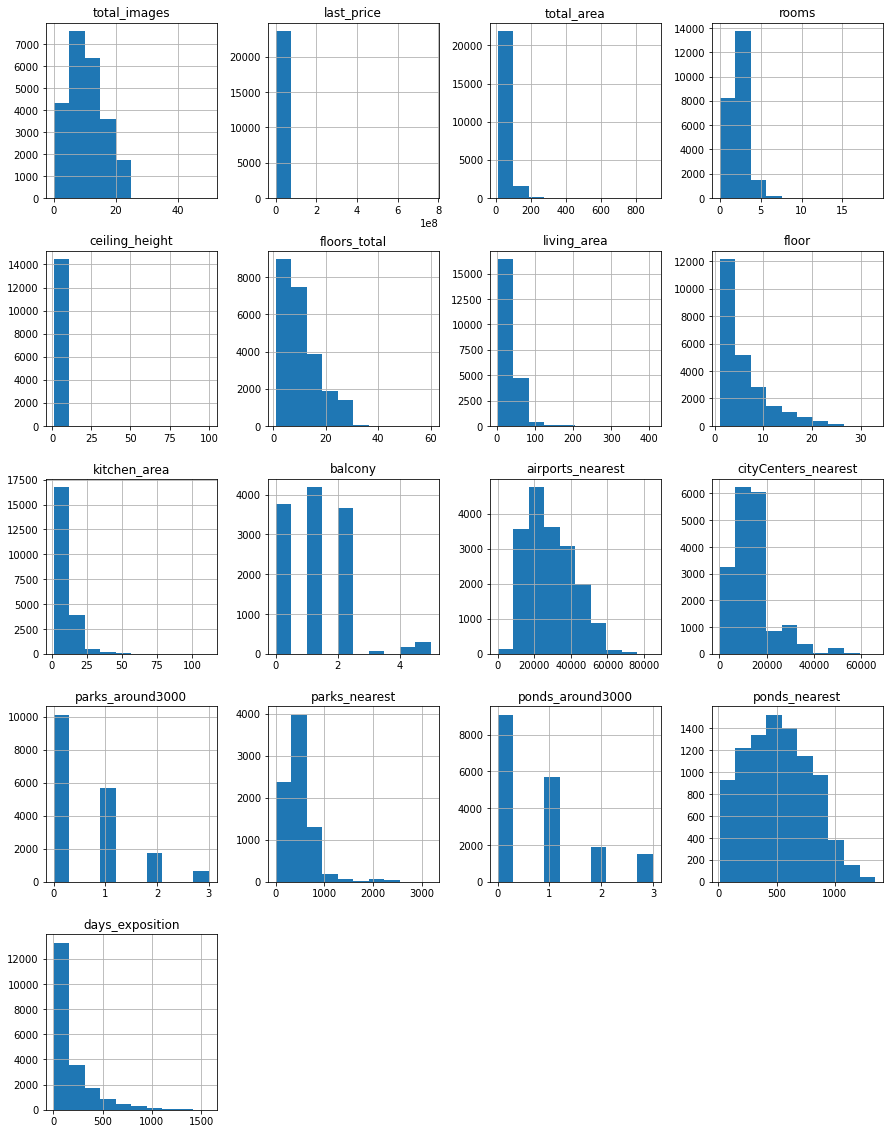

In [3]:
data.hist(figsize=(15,20));#построим общую гистрограмму для всех столбцов таблицы

*__Комментарии:__*   
Данные содержатся в 22 столбцах, с различными данными, категориальными и количественными, они содеражт булевые значения, численные и вещественные, некоторые из них нужно привести в соответсвие. Так же в данных есть пропуски, которые тоже нужно обработать. Гистограммы показывают, что в некоторых данных нужно разобраться, особенно там, где есть один пик, возможно эти сырые данные не отражают действительность, из-за пропусков или аномалий в значениях. Обработаем неявные дубликаты и аномальные значения.

### Предобработка данных

__1.Удаляем пропуски__

In [4]:
data.isna().sum()#выводим количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

__Комментарии:__  
В четырнадцати столбцах есть пропущенные значения. Пропущенные значения возможны из-за ошибки данных выгруженные навигатором или намеренно люди не заполняли данные, либо потому что не знают этой информации, либо заполняли только те данные, которые есть, здесь возможен человеческий фактор (просмотрели данные). Заполним значения столбца "balcony" цыфрой 0 (т.е. балкона нет). Столбец "is_appartament" видимо был случайным образом(если значение True, клиенты бы обязательно это указали), поэтому заполним данные булевым значением False(апартаментов нет). Название населенного пункта "locality_name" это категориальное значение, возможно они случайны, заменим его на пустую строку, чтобы потом они не мешали. Значения пропусков столбца "floors_total" удалим, так как они имеют низкую долю, менее 0.5%. Столбец "living_area" заменим медианным значением. В столбцах "parks_around3000" ,"ponds_nearest" пропущенные значения скорее всего из-за того, что их нет, заменим на значение 0(т.е. парка нет),  "ponds_around3000" заменим на 0, данные говорят о том, что их нет. "ponds_nearest" заменим на значение 1(т.е. водоем есть).

In [5]:
# код ревьюера
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
total_images,0.00%
open_plan,0.00%
floor,0.00%
rooms,0.00%
studio,0.00%
total_area,0.00%
last_price,0.00%
first_day_exposition,0.00%
locality_name,0.21%
floors_total,0.36%


In [6]:
data['balcony'] = data['balcony'].fillna(0)#заменим значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(1)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(1)
data['is_apartment'] = data['is_apartment'].fillna(False)#заменим значения на False
data = data.dropna(subset=['floors_total']).reset_index(drop=True)#удаляем пропуски в столбце и восстановим индексы

In [7]:
living_medians = data.groupby('rooms')['living_area'].median()#сгруппируем данные относительно комнат
row=data['rooms'].unique()#создадим переменную для цикла
for i in row:
    data.loc[data['rooms'] == i, 'living_area'] = data.loc[data['rooms'] == i, 'living_area'].fillna(living_medians[i])
    #заменим пропуски медианным значением

In [8]:
data.loc[:, ['kitchen_area','living_area','total_area']]#сделем срез по площадям

,kitchen_area,living_area,total_area
0,25.00,51.0,108.00
1,11.00,18.6,40.40
2,8.30,34.3,56.00
3,NaN,45.0,159.00
4,41.00,32.0,100.00
...,...,...,...
23608,13.83,73.3,133.81
23609,8.50,38.0,59.00
23610,NaN,29.7,56.70
23611,23.30,30.5,76.75


In [9]:
data.isna().sum()#проверим что пропуски исчезли

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9118
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2231
balcony                    0
locality_name             48
airports_nearest        5532
cityCenters_nearest     5509
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3172
dtype: int64

__2. Перевод даты и значений в числа.__

In [10]:
data['first_day_exposition'].head()#для того, чтобы даты вводить в арифметические операции, нужно перевести содержимое object в даты 

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')#перезапишем столбец

__Комментарии:__  
  Методом to_numeric() превратим значения float столбца "parks_nearest" в числа. Так как в ответе мы видим не ясное число с буквой и знаком "2.150e+02", для того, чтобы оно не мешало в дальнейших расчетах переведем его. Также переведем в некоторых столбцах значения на int, кроме столбца "days_exposition", так как у него останется значение float, так как пропущенные числа None переводит его автоматичски в float. 

In [12]:
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'].astype('int'))

In [13]:
data['balcony'] = pd.to_numeric(data['balcony'].astype('int'))#переведем тип float в int, так как балконы это целые числа
data['last_price'] = pd.to_numeric(data['last_price'].astype('int'))#переведем тип float в int, так как цены в основном указаны в целых числах
data['floors_total'] = pd.to_numeric(data['floors_total'].astype('int'))#переведем этажи в целые числа, так как они могут быть только целыми
data['is_apartment'] = pd.to_numeric(data['is_apartment'].astype('bool'))#переведем аппартаменты в булев тип, так как изначально нам дан столбец с булевым типом данных

In [14]:
print(data.info())#проверим перевод данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

__3. Изучение уникальных значений в столбце и устранения неявных дубликатов.__

In [15]:
data.duplicated().sum()#выведим на экран количество строк дубликатов в данных

0

In [16]:
data['locality_name'].unique()#посмотрим уникальные значения столбца

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
data['locality_name'].value_counts()#посмотрим дубликаты, которые встречаются чаще других

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
                     ...  
деревня Хапо-Ое          1
посёлок Шугозеро         1
поселок Ромашки          1
поселок Гаврилово        1
деревня Меньково         1
Name: locality_name, Length: 364, dtype: int64

In [18]:
data['locality_name'] = data['locality_name'].str.lower()#переведем названия объектов к нижнему регистру

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)#изменим в объектах названия с ё на е
data['locality_name'].value_counts()

санкт-петербург                               15651
поселок мурино                                  552
поселок шушары                                  439
всеволожск                                      398
пушкин                                          369
                                              ...  
деревня терпилицы                                 1
поселок при железнодорожной станции вещево        1
поселок городского типа большая ижора             1
деревня куровицы                                  1
деревня каськово                                  1
Name: locality_name, Length: 330, dtype: int64

4.Обработка аномальных значений

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

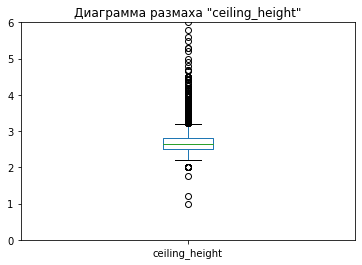

In [20]:
plt.ylim(0,6)
plt.title('Диаграмма размаха "ceiling_height"')
data.boxplot(column=['ceiling_height'],grid= False);
data['ceiling_height'].describe()

__Комментарии:__  
Можно увидеть, что большая часть значений лежит в диапазоне 2,5 м. Медиана 2,65 м. Усы простираются вправо и влево от границ ящика, верхний ус заканчивается около 3,5 м, нижний около 2,2. Выбросы начитаются от значений 3,2 и выше до 5,5 м, а также от 2,1 до 0,8. Значения в выборке отличаются на 0,2. Отклонения и выбросы говорят о том, что встречаются выбросы свыше 3,2 м. Сделаем выборку и убирем значения меньше 2 м и свыше 5 м.

In [21]:
data = (data[(data['ceiling_height']>2.0) | (data['ceiling_height']<5.0)])

In [22]:
data['ceiling_height'].unique()

array([  2.7 ,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,   2.6 ,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

В столбце "rooms" есть аномальные значения, количество комнат 16 и 19 удалим их, они аномальны

In [23]:
data['rooms'].unique()#выводим уникальные значения

array([ 3,  2,  1,  4,  6,  5,  7, 11,  0, 14, 10,  8, 15,  9, 16, 12])

In [24]:
data = data[(data['rooms'] != 16)&(data['rooms']!=19)]#удалим строки аномальных значений из датафрейма

In [25]:
data['rooms'].unique()#проверим уникальные значения

array([ 3,  2,  1,  4,  6,  5,  7, 11,  0, 14, 10,  8, 15,  9, 12])

### Посчитайте и добавьте в таблицу новые столбцы

_1.Цена одного квадратного метра_

In [26]:
data['the_price_of_one_square_meter'] = data['last_price']/data['total_area']#цену поделим на общие квадратные метры

_2.День недели_

In [27]:
data['day_of_the_weekday'] = data['first_day_exposition'].dt.weekday#используем метод dt.weekday к столбцу дате

_3.Месяц публикации объявления_

In [28]:
data['month_of_publication'] = data['first_day_exposition'].dt.month#используем метод dt.month к столбцу дата

_4.Год публикации объявления_

In [29]:
data['year_of_publication'] = data['first_day_exposition'].dt.year#используем метод dt.year к столбцу дата

_5.Тип этажа квартиры_

In [30]:
def type_floor(row):#создадим цыкл
    if row['floor'] == 1:#установим условие
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(type_floor,  axis=1)#добавим столбец

_6.Расстояние до центра города в километрах_

In [31]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()#поделим столбец на 1000, чтобы перевести в км, и используем фунцию round() для перевода в целое число

In [32]:
print(data.head())#выведим 5 строк на экран

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000       108.0           2019-03-07      3   
4              2    10000000       100.0           2018-06-19      2   
9             18     5400000        61.0           2017-02-26      3   
10             5     5050000        39.6           2017-11-16      1   
13            20     3550000        42.8           2017-07-01      2   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70            16         51.0      8         False  ...   
4             3.03            14         32.0     13         False  ...   
9             2.50             9         43.6      7         False  ...   
10            2.67            12         20.3      3         False  ...   
13            2.56             5         27.0      5         False  ...   

    parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0             482               2.0          

__Комметарии:__  
  Для построения графиков и следующих математических расчетов была произведена цена 1 кв.м., день недели, месяц публикации, год объявления, тип этажа квартиры, расстояние до центра города, новые показатели добавлены в таблицу 

### Проведите исследовательский анализ данных

__1. Изучение параметров объектов__

[[<AxesSubplot:title={'center':'total_area'}>]]


count    14494.000000
mean        61.872404
std         36.954029
min         12.000000
25%         41.000000
50%         53.375000
75%         71.300000
max        900.000000
Name: total_area, dtype: float64

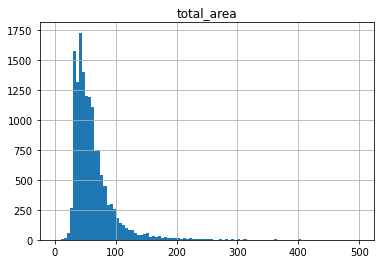

In [33]:
print(data.hist('total_area', bins=100, range=(0,500)));#построим гисторграмму на 200 корзин для общей площади
data['total_area'].describe()

_Комментарии:_ Мощный узкий пик 40 квадратных метров. Широкий пик около 100 метров квадратных. Очень мало значений было после 200 квадратных метров, но отдельные выбросы были и до 410 кв.м.

[[<AxesSubplot:title={'center':'living_area'}>]]


count      14494
unique         3
top       другой
freq       10584
Name: type_floor, dtype: object

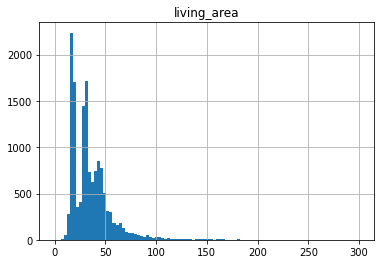

In [34]:
print(data.hist('living_area', bins=100, range=(0,300)));#построим гисторграмму на 100 корзин для жилой площади
data['type_floor'].describe()#опишем данные

_Комментарии:_ Двойной узкий пик мы видим на отметке 10-20 кв.м., а так же чуть выше на отметке 25 кв.м. Широкий пик приходится на 50 кв.м. Очень мало значений 100 кв.м., отдельные выбросы есть до отметки 250 кв.м.

[[<AxesSubplot:title={'center':'kitchen_area'}>]]


count    13558.000000
mean        10.565591
std          6.048347
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

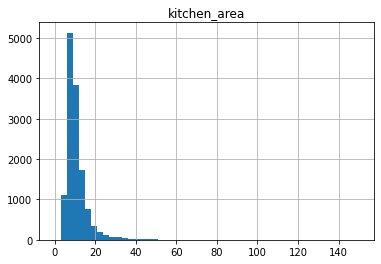

In [35]:
print(data.hist('kitchen_area', bins=50, range=(0,150)));#построим гисторграмму на 50 корзин для площади кухни
data['kitchen_area'].describe()

_Комментарии:_ Самый высокий пик выпал на 7-8 кв.м., затем чуть ниже на 10 кв.м., основной широкий пик приходится до 20 кв.м.После 40 кв.м. приходится на мало значений.

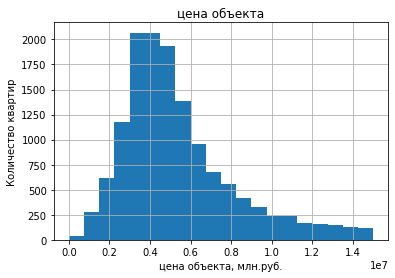

count    1.449400e+04
mean     6.832481e+06
std      1.018295e+07
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [36]:
data['last_price'].hist(bins = 20, grid=True, range = (0,15000000))
plt.title('цена объекта')
plt.xlabel('цена объекта, млн.руб.')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].describe()

_Комментарии:_ Самый большой пик по стоимости 3 млн.руб, затем второй пик стоимости снижается до 4 млн.руб. Затем мы видим постепенное снижение относительно количества квартир и роста цены, там где выше цена, тем объектов меньше. Максимальное значение стоимости жилья составляет 7,6 млн.руб.

[[<AxesSubplot:title={'center':'rooms'}>]]


count    14494.000000
mean         2.136263
std          1.092679
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: rooms, dtype: float64

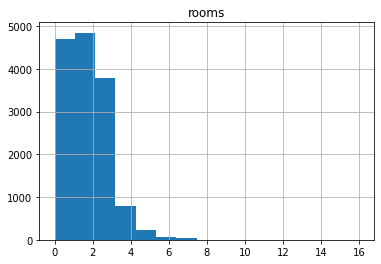

In [37]:
print(data.hist('rooms', bins= data['rooms'].nunique(), range=(0,16)));#построим гисторграмму на 10 корзин для количества комнат
data['rooms'].describe()

_Комментарии:_ Большинство жилых объектов состоит из 1-2 комнат, также возможно студии, поэтому на гистограмме мы видим 0 комнат во втором пике. Реже жилых объектов из 4-6, и совсем мало из 7-9 комнат.

AxesSubplot(0.125,0.125;0.775x0.755)


count    14494.000000
mean         2.771479
std          1.261487
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

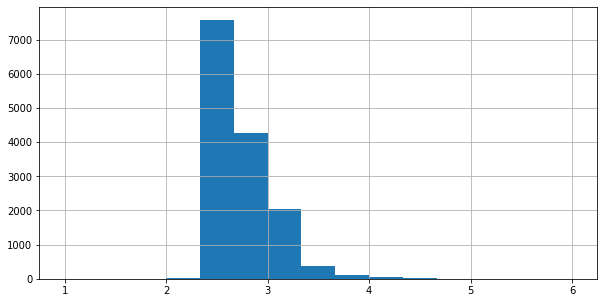

In [38]:
print(data['ceiling_height'].hist(bins=15, range=(1,6), figsize=(10, 5)));#построим гисторграмму на 15 корзин для высоты потолков
data['ceiling_height'].describe()

_Комментарии:_ Большой пик приходится на высоту потолков в 2,65 м, реже на 3 м, и совсем мало значений после 3,2 м. Есть отдельные значения свыше 3,7 м, но их очень мало.

count    14494.000000
mean         5.621223
std          4.612572
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

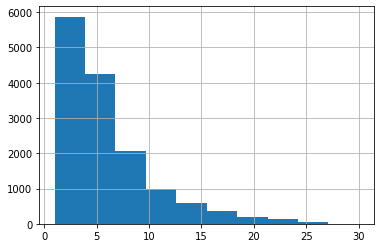

In [39]:
data['floor'].hist();#построим гистограмму на 10 корзин для этажа квартиры
data['floor'].describe()

_Комментарии:_ Большой пик мы видим с первого по четверты этаж, здесь видимо больше всего значений, таже широкий пик на 5 этаже, меньше объектов с 7 этажа до 15. Совсем мало с 17 по 20 этажей. И есть отдельные выбросы до 27 этажа.

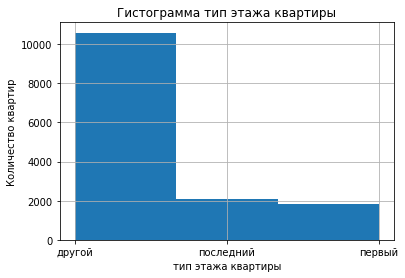

count      14494
unique         3
top       другой
freq       10584
Name: type_floor, dtype: object

In [40]:
data['type_floor'].hist(bins= data['type_floor'].nunique());
plt.title('Гистограмма тип этажа квартиры')
plt.xlabel('тип этажа квартиры')
plt.ylabel('Количество квартир')
plt.show()
data['type_floor'].describe()

_Комментарии:_ По гистограмме видно, что жилья с первым и последним этажом около 3000, причем последнего чуть больше первого. Самый высокий пик этажей квартир "другой".

[[<AxesSubplot:title={'center':'floors_total'}>]]


count    14494.000000
mean        10.173451
std          6.202075
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

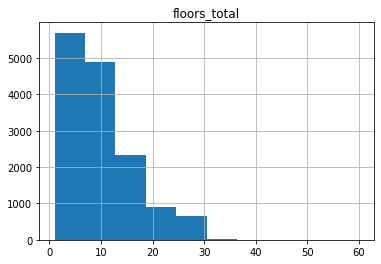

In [41]:
print(data.hist('floors_total'));#построим гистограмму на 10 корзин для этажности дома
data['floors_total'].describe()

_Комментарии:_ Большой пик приходится на четырех-пяти этажное здание, реже на десятиэтажное здание. Но встречаются и пятнадцатиэтажные здания, на них приходится широкий пик. Очень мало двадцатиэтажных зданий, а вот 24 этажных зданий чуть больше. Есть и отдельные выбросы 29,35 этажные здания.

[[<AxesSubplot:title={'center':'cityCenters_nearest'}>]]


count    11551.000000
mean     14068.322310
std       8760.624622
min        181.000000
25%       9041.000000
50%      12956.000000
75%      16034.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

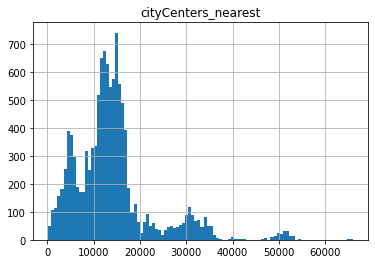

In [42]:
print(data.hist('cityCenters_nearest', bins=100));#построим гистограмму на 100 корзин для расстояния до центра города в м
data['cityCenters_nearest'].describe()

_Комментарии:_ Самый высокий пик приходится на 15000 м,чуть ниже вторым по высоте пиком является 12000м. Самым широким пиком приходится на от 10000 м до 17000 м. Реже отдаленность от центра приходится на 5000 м, и совсем мало мы видим объекты на расстоянии 100 м, и от 20000 м до 35000 м. Есть шумы на расстоянии 40000 м и 50000 м.

[[<AxesSubplot:title={'center':'airports_nearest'}>]]


count    11531.000000
mean     28820.283410
std      12622.930092
min          0.000000
25%      18554.500000
50%      26752.000000
75%      37083.000000
max      84869.000000
Name: airports_nearest, dtype: float64

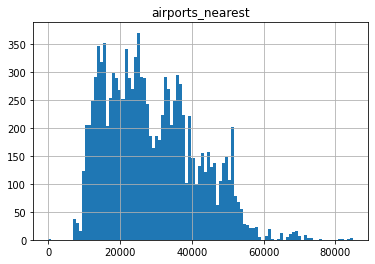

In [43]:
print(data.hist('airports_nearest', bins=100));#построим гистограмму на 100 корзин для расстояния до ближайшего аэропорта
data['airports_nearest'].describe()

_Комментарии:_ Самый большой пик расстояния до ближайшего аэропорта приходится на 25000 м, чуть ниже пики на 18000 м, 19000 м и 21000 м. Есть еще чуть ниже два пика на 37000 м и 38000 м. Самый широкий пик приходится на 30000 м, реже на 42000 м и 53000 м. Совсем мало значений после 57000 м. Есть и отдельные выборосы после 59000 м.

[[<AxesSubplot:title={'center':'parks_nearest'}>]]


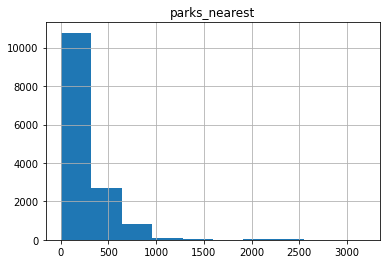

In [44]:
print(data.hist('parks_nearest'));#построим гистограмму на 10 корзин для расстояния от объекта до ближайшего парка в м

_Комментарии:_ Здесь мы видим самый большой пик на расстоянии 150 м, т.е. в основном парк есть рядом с объектом. Второй пик не большой на расстоянии 300 м, чуть меньше пик на расстоянии 600 м, и совсем мало значений на расстоянии 900 м, есть и небольшие выбросы после 1000 м, их немного и они продолжаются до 2500 м.

[[<AxesSubplot:title={'center':'day_of_the_weekday'}>]]


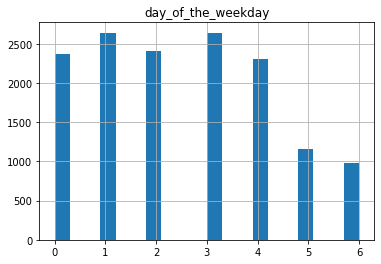

In [45]:
print(data.hist('day_of_the_weekday', bins=20));#построим гистограмму на 20 корзин для публикации дня недели

_Комментарии:_ Самый высокий пик приходится на 3 день(четверг) публикации, чуть ниже 1(вторник) и 4(пятница) пик. Так же делают публикации в 0(понедельник), и совсем мало публикаций в 5(субботу) и в 6(воскрсенье).

[[<AxesSubplot:title={'center':'month_of_publication'}>]]


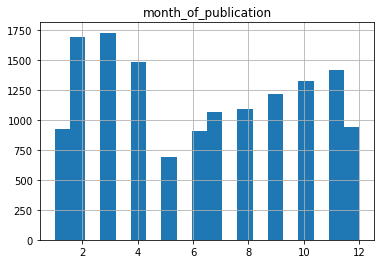

In [46]:
print(data.hist('month_of_publication', bins=20));#построим гистограмму на 20 корзин для публикации месяца

Самый высокий пик приходится на 2 месяц года(февраль), чуть меньше в 3 месяце(март). В 4 (апрель) и 11(ноябрь) тоже не мало публикуется объявлений. Самый низкие публикации в 1(январь) и 5(май) месяцах.

__2. Изучение параметра быстроты реализации объекта__

_1.Построим гистограмму_

[[<AxesSubplot:title={'center':'days_exposition'}>]]


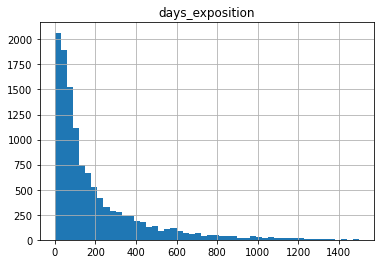

In [47]:
print(data.hist('days_exposition', bins=50, range=(0,1500)))#построим гистограмму на 100 корзин

_Комментарии:_ На гистограмме виден самый большой пик приходится на первые 30 дней реализации публикации, затем снижается до 60 дней, чуть ниже пик идет на 100 дней. Далее мы видим плавное снижение пиков после 200 дней и до 400 дней. Шумы приходятся от 500 и до 1380 дней.

_2. Посчитаем среднюю и медиану._

In [48]:
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

103.0
190.23638326137495


Данные по средней и медиане сильно отличается друг от друга, видимо на эти показатели влияют выбросы.

_3.Выясним какие продажи являются быстрыми, а какие необычно долгими_

In [49]:
total_advertisement = data.shape[0]#посчитаем количество объявлений
print('Количество объявлений:', total_advertisement)

Количество объявлений: 14494


In [50]:
total_name = len(data['locality_name'].unique())#посчитаем количество населенных пунктов
(print('Количество населенных пунктов:', total_name))

Количество населенных пунктов: 259


In [51]:
print(data['first_day_exposition'].min(),data['first_day_exposition'].max())#выявим максимальные и минимальные даты

2014-11-27 00:00:00 2019-05-03 00:00:00


_Комментарии:_ Мы посчитали количество объеявлений для математических операций. Выявили максимальные и минимальные даты размещения объявлений. Получается что, временной период взят в количестве 5лет 6 месяцев и 3 дня, в переводе на дни, будет 2011 дней.

In [52]:
total_days = 2011#запишем количество дней в переменную
number_of_ads_per_day = total_advertisement/total_name/total_days
print('Количество объявлений в сутки:', number_of_ads_per_day)

Количество объявлений в сутки: 0.02782764294450023


Количество объявлений практически на 0. Слишком длительные объявления мешают нам в расчетах.

Нужно разобраться с аномалиями в выборке. Найдем самые длинные периоды публикаций

In [53]:
print(data.sort_values(by='days_exposition', ascending=False).head(5))

       total_images  last_price  total_area first_day_exposition  rooms  \
18771            11     3500000        48.2           2014-12-15      2   
9522             11    10600000        80.0           2014-12-09      3   
1880              2    13300000        79.6           2014-12-09      2   
20891            18    13300000       133.0           2015-02-11      4   
14036             7     9500000       100.0           2015-02-19      4   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
18771            2.50             5         27.4      2         False  ...   
9522             2.85            17         44.0      9         False  ...   
1880             3.00             8         42.7      7         False  ...   
20891            3.00             5         58.0      2         False  ...   
14036            3.00             5         76.0      5         False  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
18771 

In [54]:
sample = data.query('first_day_exposition=="2014-12-15"')#сделаем срез по этой дате
print(len(sample))#количество объявлений в эту дату

5


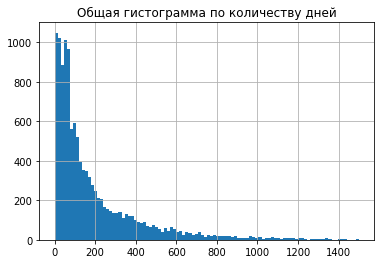

In [55]:
data.hist('days_exposition', bins=100, range=(0,1500))
plt.title('Общая гистограмма по количеству дней')
plt.show()

_Комментарии:_ На общей гистограмме по количеству дней мы видим шумы после 500 дней, и они редки. В результате, мы приходим к выводу, что это выбросы.
Примем верхнюю границу в 500 дней. Это число кажется разумным, по которому может продаться объект, далее его значения могут быть не актуальными(например цена объекта). Продолжим работать с наблюдением, удовлетворяющему условию data.query('days_exposition<500').

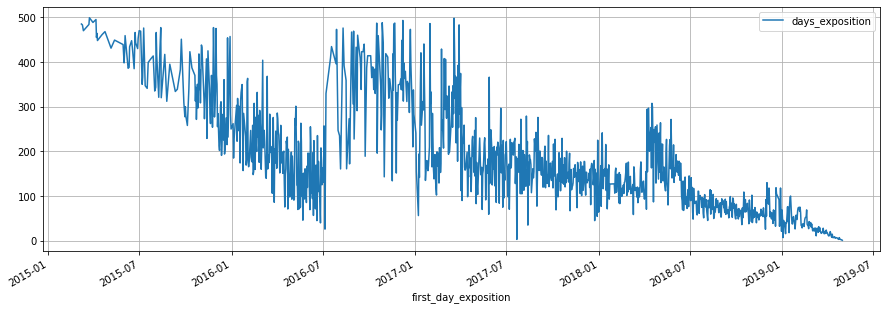

In [56]:
(
    data.query('days_exposition<500')
    .pivot_table(index='first_day_exposition', values='days_exposition')
    .plot(grid=True, figsize=(15,5))
);#обратимся к сводной таблице, чтобы сделать график и наглядно посмотреть сколько времени занимает продажа объекта

В февраля 2015 года и до января 2016 года продавались объекты свыше 250 дней практически 8 месяцев. А с июля 2016 года по апрель 2017 года в основном жилье продавалось от 300 до 450 дней. Средняя продолжительность продажи жилья с апреля 2017 года снизилась до 170 дней. Видимо какие-то факторы повлияли на продажу жилья, и в этот период они стали продаваться быстрее(возможно активно начали работать риэлоровские агенства). После июля 2018 года, продажа жилья ускорилась до 100 дней.

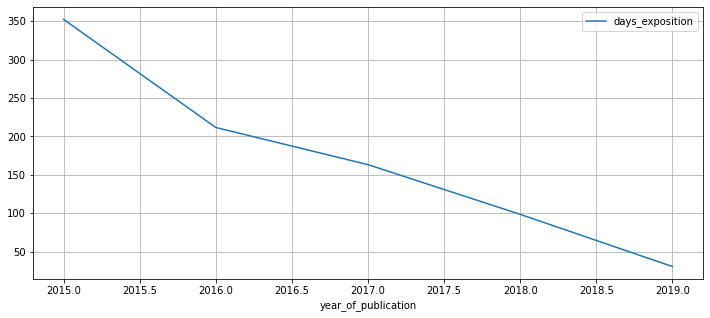

In [57]:
(
    data.query('days_exposition<500')
    .pivot_table(index='year_of_publication', values='days_exposition')
    .plot(grid=True, figsize=(12,5))
);#построим график распределенный по годам в зависимости от количества дней продажи

В графике видно что продажа обектов повышается в зависимоти от года. Если в 2015 году объекты продавались 350 дней,то в 2017 году на реализацию объекта приходилось в два раза меньше времени. А к 2019 году вообще около месяца.

In [58]:
data = data.query('days_exposition<500')#перезапишем датафрейм

In [59]:
print(len(data.query('days_exposition<10'))/len(data))#посчитаем долю объявлений менее 10 дней

0.06311347582790569


Аномально быстрых продаж 0,6%. Это не много для общей суммы. 

In [60]:
data['days_exposition'].describe()

count    10901.000000
mean       130.539217
std        120.746923
min          1.000000
25%         41.000000
50%         89.000000
75%        188.000000
max        499.000000
Name: days_exposition, dtype: float64

В срднем можно сказать, что продажа объекта занимает 173 дня. Менее 90 дней считается быстрая реализация объекта, а свыше 90 дней медленная.

_3. Какие факторы больше всего влияют на общую(полную) стоимость объекта._

Text(0.5, 1.0, 'Цена от общей площади объекта')

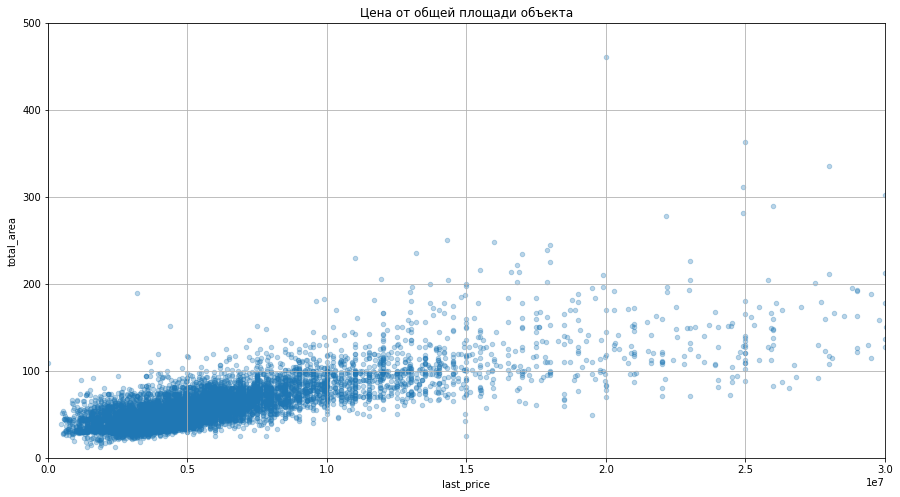

In [61]:
data.plot(x='last_price', y='total_area', ylim=(0, 500), xlim=(0, 30000000), style='o', grid=True, figsize=(15, 8), kind='scatter', alpha=0.3);
plt.title('Цена от общей площади объекта')#построим график распределенный по общей площади объекта в зависимости от общей стоимости объекта

In [62]:
print('Коэффициент корреляции от общей площади:', data['total_area'].corr(data['last_price']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции от общей площади: 0.7095742819646014


_Комментарии:_ Коэффицент корреляции 0,7 средний, и по диаграмме мы видим верхнюю границу средней положительной зависимости общей площади объекта от общей стоимости, чем выше площадь, тем выше стоимость. В самом начале диаграммы густое пятно, с площадью до 100 кв.м. и стоимостью до 1млн.руб.

Text(0.5, 1.0, 'Цена от жилой площади объекта')

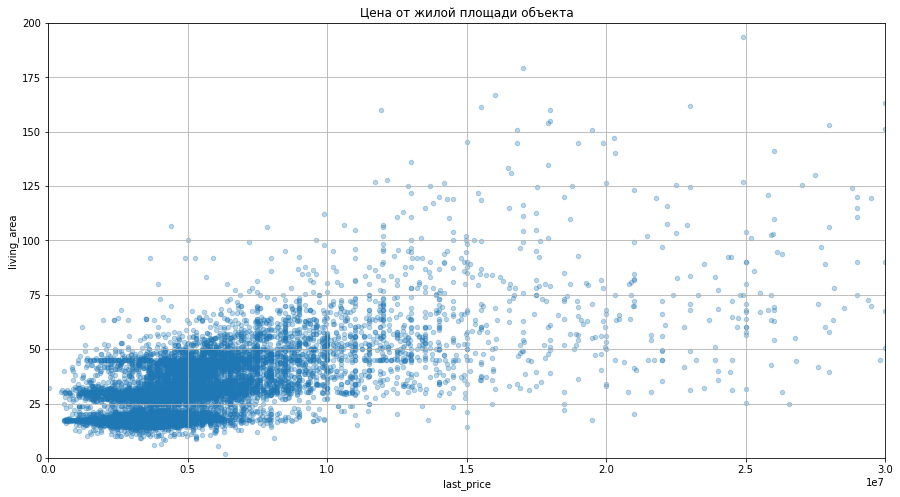

In [63]:
data.plot(x='last_price', y='living_area', ylim=(0, 200), xlim=(0, 30000000), style='o', grid=True, figsize=(15, 8), kind='scatter', alpha=0.3);
plt.title('Цена от жилой площади объекта')

In [64]:
print('Коэффициент корреляции от жилой площади:',data['living_area'].corr(data['last_price']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции от жилой площади: 0.5922556957588917


_Комментарии:_ Коэффициент корреляции слабый 0,5. По диаграмме мы видим большое пятно вначале диаграммы, которая положительная. В основном площадь до 50 кв.м., и стоимость до 1 млн.руб. 

Text(0.5, 1.0, 'Цена от площади кухни объекта')

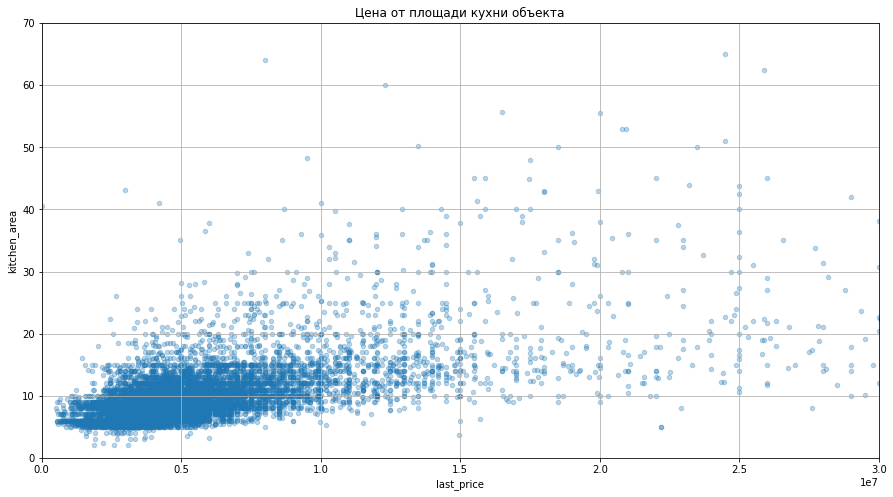

In [65]:
data.plot(x='last_price', y='kitchen_area', ylim=(0, 70), xlim=(0, 30000000), style='o', grid=True, figsize=(15, 8), kind='scatter', alpha=0.3)
plt.title('Цена от площади кухни объекта')#построим диаграмму рассеяния в зависимости от площади кухни и общей стоимости объекта

In [66]:
print('Коэффициент корреляции от площади кухни:', data['kitchen_area'].corr(data['last_price']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции от площади кухни: 0.5266957654955305


Коэффициент корреляции слабый 0,5. И на диаграмме мы выдим умеренно положительную корреляцию. В основном от 5кв.м. до 20 кв.м. и стоимости до 1млн.руб. сосредоточены данные. Прослеживается слабая зависимость цены от площади кухни.

<AxesSubplot:xlabel='rooms'>

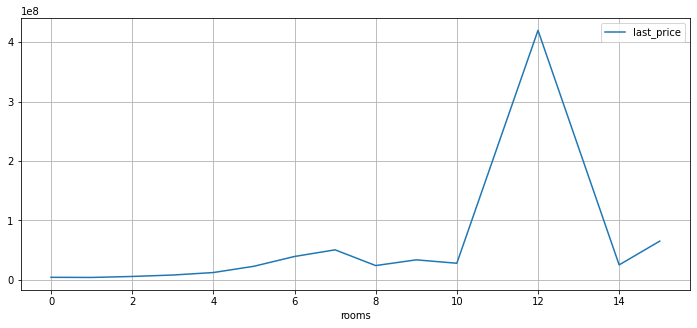

In [67]:
(data
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, figsize=(12,5))
)#построим график распределенный от количества комнат объекта в зависимости от общей стоимости объекта

In [68]:
print('Коэффициент корреляции от количества комнат:', data['rooms'].corr(data['last_price']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции от количества комнат: 0.3904051777856823


Коэффициент корреляции слабый 0,3. По графику видно сильную зависимость стоимости жилья от 10 до 14 комнат.

<AxesSubplot:xlabel='type_floor'>

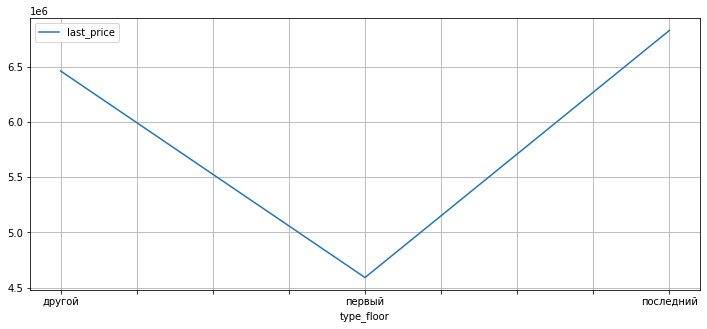

In [69]:
(data
    .pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, figsize=(12,5))
)#построим график распределенный от этажа объекта в зависимости от общей стоимости объекта

По графику видно что сильная зависимость цены объекта происходит от другого и последнего этажа. К сожалению первый этаж по стоимости падает, в отличие от остальных этажей. Значит стоимость объекта зависит от этажности объекта.

<AxesSubplot:xlabel='month_of_publication'>

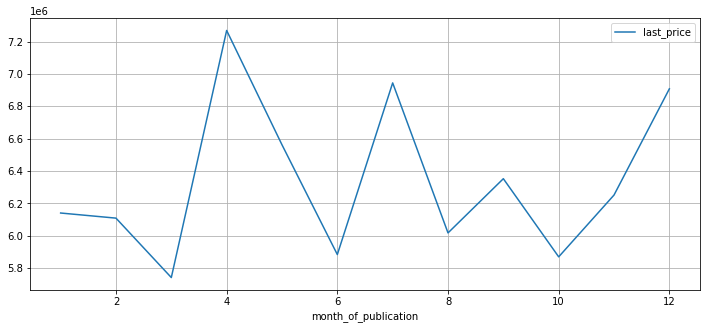

In [70]:
(data
    .pivot_table(index='month_of_publication', values='last_price')
    .plot(grid=True, figsize=(12,5))
)#построим график распределенный по месяцам в зависимости от общей стоимости объекта

<AxesSubplot:xlabel='day_of_the_weekday'>

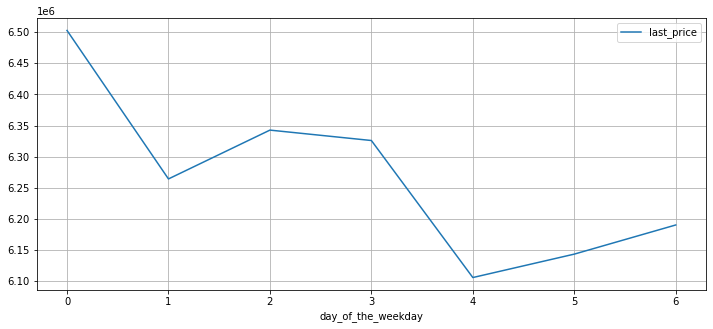

In [71]:
(data
    .pivot_table(index='day_of_the_weekday', values='last_price')
    .plot(grid=True, figsize=(12,5))
)#построим график распределенный по дням недели в зависимости от общей стоимости объекта

<AxesSubplot:xlabel='year_of_publication'>

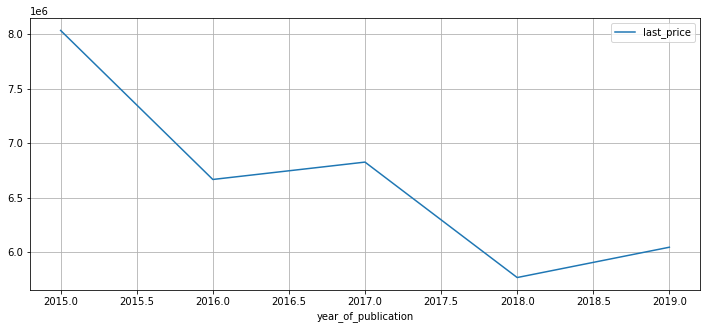

In [72]:
(data
    .pivot_table(index='year_of_publication', values='last_price')
    .plot(grid=True, figsize=(12,5))
)#построим график распределенный по дням недели в зависимости от общей стоимости объекта

_Комментарии:_ По графику мы видим большие скачки продаж в апреле, июле и декабре, видимо в эти месяца наиболее чаще люди думают о переезде. Также мы видим сильную зависимость от продаж с понедельника по четверг. Сильная зависимость была и по годам, с 2015 года по 2017 год.

__4.Средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.__

In [82]:
cost_meter_table = data.pivot_table(index = 'locality_name', values = 'the_price_of_one_square_meter', aggfunc=['count', 'mean'])
cost_meter_table.columns = ['count', 'mean']
cost_meter_table = cost_meter_table.sort_values('count', ascending = False).head(10)
print(cost_meter_table.head(10))

                   count           mean
locality_name                          
санкт-петербург     7607  112205.746378
всеволожск           201   66291.255075
поселок мурино       191   87777.656223
поселок шушары       176   78429.064882
колпино              170   74881.549470
пушкин               167  101760.621743
поселок парголово    115   89570.355642
гатчина              114   69894.158606
петергоф             110   83133.000359
деревня кудрово      106   91143.697618


In [74]:
print('Населенный пункт с самой низкой ценой:', cost_meter_table.query('mean == mean.min()'))
print('Населенный пункт с самой высокой ценой:', cost_meter_table.query('mean == mean.max()'))

Населенный пункт с самой низкой ценой:                count          mean
locality_name                     
всеволожск       201  66291.255075
Населенный пункт с самой высокой ценой:                  count           mean
locality_name                        
санкт-петербург   7607  112205.746378


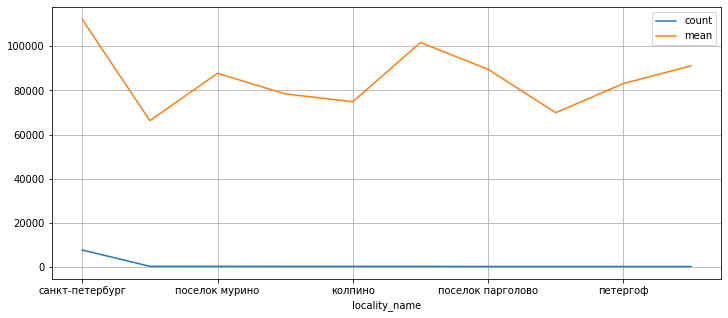

In [75]:
cost_meter_table.plot(grid=True, figsize=(12,5));

_Комментарии:_ Самая низкая цена 1 кв.м. в Всеволожске 66291 руб, а самая высокая цена 1 кв.м. в Санкт-Петербурге 112205 руб. Поселок Паргалово и Пушкино по стоимости чуть ниже, в основном график колеблится, но в диапазоне самой низкой и высокой цены.

In [ ]:
# код ревьюера
cost_meter_table = cost_meter_table.reset_index()
cost_meter_table.columns = ['locality_name', 'flat_count', 'avg_price']

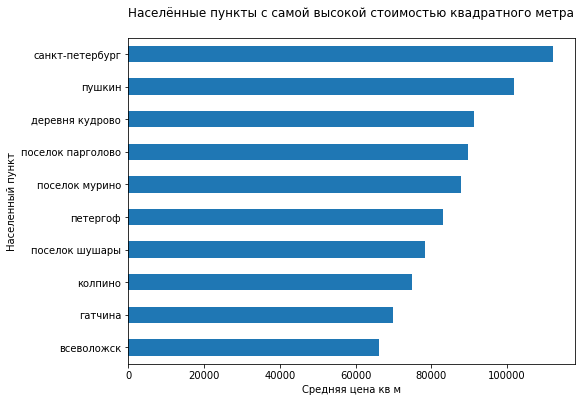

In [85]:
# код ревьюера 

cost_meter_table.sort_values(by='avg_price').tail(10).plot(x='locality_name', y='avg_price', kind='barh', figsize=(8,6), legend=False)
plt.xlabel('Средняя цена кв м')
plt.ylabel('Населенный пункт')
plt.title('Населённые пункты с самой высокой стоимостью квадратного метра\n')
plt.show()

__5. Средняя цена 1 км в Санкт-Петербурге.__

In [76]:
pivot_table_km = data.query('locality_name == "санкт-петербург" and cityCenters_nearest_km <=10').pivot_table(index = 'cityCenters_nearest_km', values = 'the_price_of_one_square_meter', aggfunc = 'mean')
print('Средняя цена 1 км в Санкт-Петербурге:', pivot_table_km.mean())

Средняя цена 1 км в Санкт-Петербурге: the_price_of_one_square_meter    136397.878949
dtype: float64


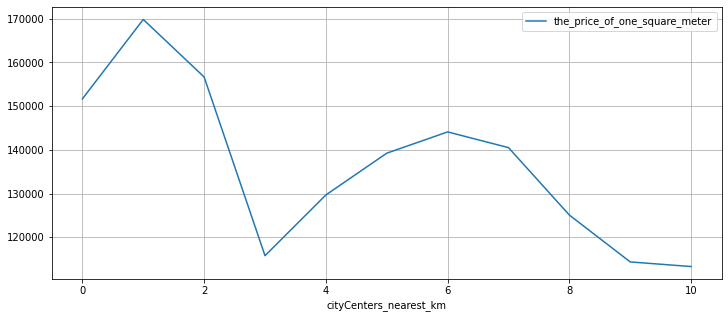

In [77]:
pivot_table_km.plot(grid=True, figsize=(12,5));

Стоимость 1 кв.м. на расстояние от центра влияет сильно. В основном объекты состредоточены в центре. В Санкт-Петербурге стоимость на 1 км в среднем приходится 136 тыс. руб. На графике мы видим высокие пики по стоимости ближе к центру от 1 до 6 км.

### Общий вывод

 Факторы, которые влияют на рыночную стоимость жилья следующие.
    Расстояние до парка 150-300м, день недели(вторник - четверг), месяц года(февраль, март, апрель, ноябрь), важным фактором является общая площадь жилья (особенно пользуется спросом 40 кв.м. и 100 кв.м.), жилая площадь(10-25 кв.м. и 50 кв.м.), площадь кухни(8 кв.м. и 10 кв.м.). Стоимость жилья, которая в основном 3-4 млн.руб. и 6 млн.р. тоже важный фатор. Количество комнат 2-3, реже 4-6, размер потолков не менее 2,65м, этажность в основном 5-10, тип этажа объекта, все кроме последнего и первого, расстояние до центра города 10000-17000 м, расстояние до аэропорта на 25000 м.
    На общую стоимость объекта влияет общая площадь объекта, жилая площадь, этаж объекта, стоимость 1 кв.м. к соотношению к расстоянию до центра города.